In [4]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\prath\Desktop\Github\Data analysis Pro\Python Movie\movies.csv')

In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
# lets see if we have any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col ,pct_missing*100))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [7]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
df.isnull().sum()
# Replacing the NaN values in the score column with the mean of the column
# df["score"].unique()
# df["score"].mean()

mean_s = df["score"].mean()
print(mean_s)
df["score"].fillna(mean_s, inplace = True)

#Replacing NaN values with in the mean of the votes column
# df["votes"].unique()

mean_v = df["votes"].mean()
# print(mean_v)
mean_v = df["votes"].mean()
# print(mean_v)
df["votes"].fillna(mean_v, inplace = True)

#Replacing NaN values it the Writer Column
df["writer"].unique()
df["writer"].fillna("Unknown Writer", inplace = True)

#Replacing NaN values in the Star Column

df["star"].unique()

df["star"].unique()
df["star"].fillna("Unknown Star", inplace = True)

#Replacing NaN values in the Country column
# df["country"].unique()

df["country"].unique()
df["country"].fillna("Unknown Country", inplace = True)

#Replacing NaN values in the budget column with the mean of the column
mean_b = df["budget"].mean()
print(mean_b)
df["budget"].fillna(mean_b, inplace = True)

mean_b = df["gross"].mean()
print(mean_b)
df["gross"].fillna(mean_b, inplace = True)


mean_b = df["runtime"].mean()
print(mean_b)
df["runtime"].fillna(mean_b, inplace = True)

mean_b = df["release_date"].mean()
print(mean_b)
df["release_date"].fillna(mean_b, inplace = True)


# Similar Strategies were used for the Gross, Company, Runtime

# I also split the "released column" to release_date and Release_Country and changed the date from object to Date_time format

# Splitting the Released Column into Date_Released and Country_Released
# df["released"].unique()

df[["release_date", "release_country"]] = df["released"].str.split("(", expand = True)

df["release_date"] = pd.to_datetime(df["release_date"], format= "%B %d, %Y", infer_datetime_format = True)

6.390410958904109
35589876.192650534
78500541.01778312
107.2616127348643


KeyError: 'release_date'

In [ ]:
# change the data type of columns 

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [ ]:
df = df.sort_values(by=['gross'] , inplace=False , ascending=False)

In [ ]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending = False)



In [ ]:
pd.set_option('display.max_rows' , None)

In [ ]:
#scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [ ]:
df.head()

In [ ]:
# budget vs gross using seaborn 

sns.regplot(x='budget' , y= 'gross', data=df , scatter_kws={"color" : "red"} , line_kws={"color" : "blue"})

In [9]:
# correlation 

In [10]:
df.corr(method ="pearson") #types of correlation - pearson(default method) , kendall , spearman

C:\Users\prath\AppData\Local\Temp\ipykernel_7980\2419456436.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ="pearson") #types of correlation - pearson(default method) , kendall , spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.097936,0.222810,0.265578,0.252042,0.120766
score,0.097936,1.000000,0.409182,0.064541,0.182868,0.399329
votes,0.222810,0.409182,1.000000,0.421007,0.628713,0.309166
budget,0.265578,0.064541,0.421007,1.000000,0.711270,0.265287
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241335
runtime,0.120766,0.399329,0.309166,0.265287,0.241335,1.000000


In [11]:
# high correlation between budget and gross 

C:\Users\prath\AppData\Local\Temp\ipykernel_7980\3491292268.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method ="pearson")


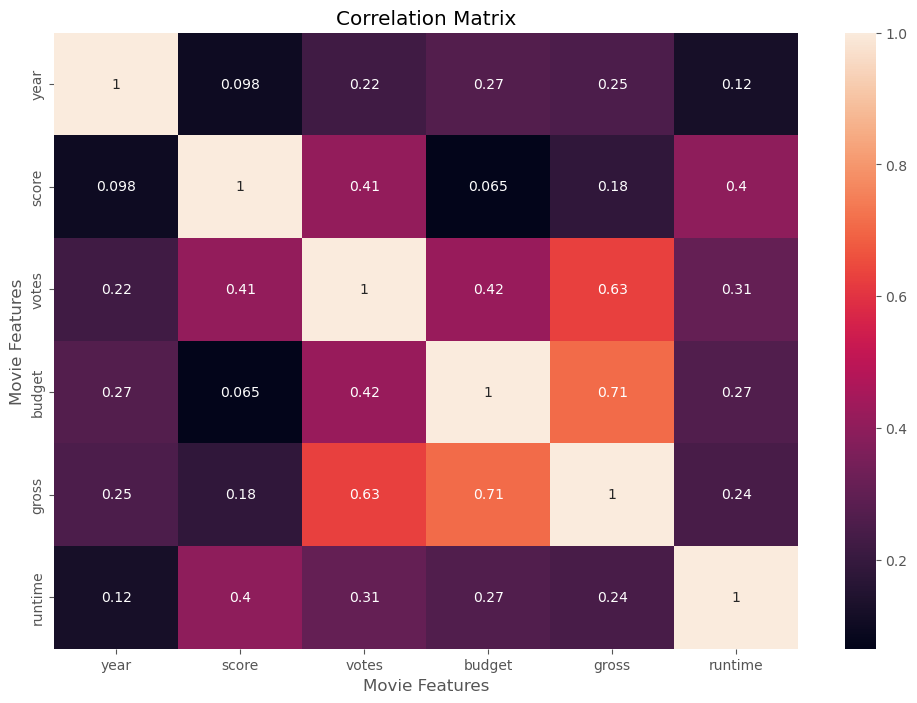

In [14]:
correlation_matrix = df.corr(method ="pearson")

sns.heatmap(correlation_matrix , annot = True)

plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [15]:
# Look at Company 

In [17]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype =='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.400000,9.270000e+05,2589,4014,1047,54,1.900000e+07,4.699877e+07,2319,146.000000
1,5573,6,1,1980,1492,5.800000,6.500000e+04,2269,1632,327,55,4.500000e+06,5.885311e+07,731,104.000000
2,5142,4,0,1980,1771,8.700000,1.200000e+06,1111,2567,1745,55,1.800000e+07,5.383751e+08,1540,124.000000
3,286,4,4,1980,1492,7.700000,2.210000e+05,1301,2000,2246,55,3.500000e+06,8.345354e+07,1812,88.000000
4,1027,6,4,1980,1543,7.300000,1.080000e+05,1054,521,410,55,6.000000e+06,3.984634e+07,1777,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.100000,1.800000e+01,1500,2289,2421,55,7.000000e+03,7.850054e+07,-1,90.000000
7664,1678,-1,4,2020,1107,4.700000,3.600000e+01,774,2614,1886,55,3.558988e+07,7.850054e+07,539,90.000000
7665,4717,-1,6,2020,193,5.700000,2.900000e+01,2061,2683,2040,55,5.875000e+04,7.850054e+07,941,107.261613
7666,2843,-1,6,2020,2817,6.390411,8.810850e+04,1184,1824,450,55,1.500000e+04,7.850054e+07,-1,120.000000


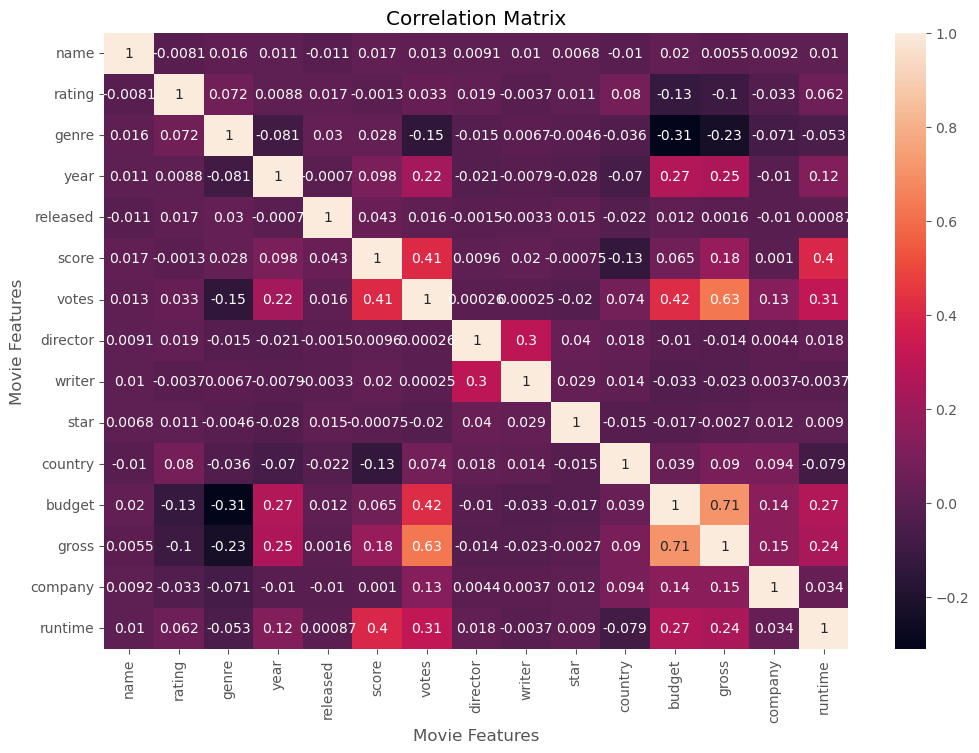

In [18]:
correlation_matrix = df_numerized.corr(method ="pearson")

sns.heatmap(correlation_matrix , annot = True)

plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [19]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017095,0.013086,0.009079,0.009985,0.006844,-0.010359,0.020368,0.005466,0.009211,0.010390
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001310,0.033127,0.019483,-0.003725,0.011366,0.079590,-0.126046,-0.102116,-0.032943,0.062051
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027959,-0.145276,-0.015258,0.006747,-0.004641,-0.035783,-0.310566,-0.230267,-0.071067,-0.052699
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097936,0.222810,-0.020795,-0.007930,-0.027912,-0.069590,0.265578,0.252042,-0.010431,0.120766
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042779,0.016094,-0.001478,-0.003326,0.015446,-0.022160,0.012263,0.001636,-0.010474,0.000867
score,0.017095,-0.001310,0.027959,0.097936,0.042779,1.000000,0.409182,0.009559,0.019787,-0.000754,-0.134447,0.064541,0.182868,0.001030,0.399329
votes,0.013086,0.033127,-0.145276,0.222810,0.016094,0.409182,1.000000,0.000260,0.000252,-0.019510,0.073521,0.421007,0.628713,0.133129,0.309166
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299523,0.039875,0.018014,-0.010364,-0.014272,0.004404,0.017624
writer,0.009985,-0.003725,0.006747,-0.007930,-0.003326,0.019787,0.000252,0.299523,1.000000,0.028887,0.014490,-0.033223,-0.023192,0.003682,-0.003692
star,0.006844,0.011366,-0.004641,-0.027912,0.015446,-0.000754,-0.019510,0.039875,0.028887,1.000000,-0.015101,-0.017056,-0.002678,0.011901,0.008957


In [20]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.079188
         budget      0.265287
         gross       0.241335
         company     0.034383
         runtime     1.000000
Length: 225, dtype: float64

In [21]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget   genre     -0.310566
genre    budget    -0.310566
gross    genre     -0.230267
genre    gross     -0.230267
         votes     -0.145276
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [22]:
high_corr = sorted_pairs[(sorted_pairs) >0.5]

high_corr

gross     votes       0.628713
votes     gross       0.628713
budget    gross       0.711270
gross     budget      0.711270
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# votes and budget have the highest correlation to gross earnings
